In [1]:
from astropy.io import fits
import astropy.units as u
from astropy.nddata import CCDData
from astropy.stats import sigma_clipped_stats, SigmaClip
from astropy.visualization import ImageNormalize, LogStretch
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import numpy as np
from photutils.background import Background2D, MeanBackground

# Show plots in the notebook
%matplotlib inline

In [2]:
plt.style.use('../photutils_notebook_style.mplstyle')

OSError: '../photutils_notebook_style.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

In [28]:
urlB = 'https://www.spacetelescope.org/static/projects/fits_liberator/datasets/m12/Bcomb.zip'
with fits.open(urlB) as hdulist:
    hdulist.info()
    dataB = hdulist[0].data
    headerB = hdulist[0].header

Filename: /Users/jackroberson/.astropy/cache/download/py3/f88769989cf57ea97741527bcd45a6f6
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   (2048, 2048)   float32   


In [29]:
urlV = 'https://www.spacetelescope.org/static/projects/fits_liberator/datasets/m12/Vcomb.zip'
with fits.open(urlV) as hdulist:
    hdulist.info()
    dataV = hdulist[0].data
    headerV = hdulist[0].header

Filename: /Users/jackroberson/.astropy/cache/download/py3/2b70d54bc84f57921cca13a2a3a5fcf5
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     323   (2048, 2048)   float32   


In [30]:
mask = data == 0

In [33]:
unit = u.electron / u.s
xdf_image = CCDData(dataB, unit=unit, meta=headerB, mask=mask)

Text(0, 0.5, 'Y (pixels)')

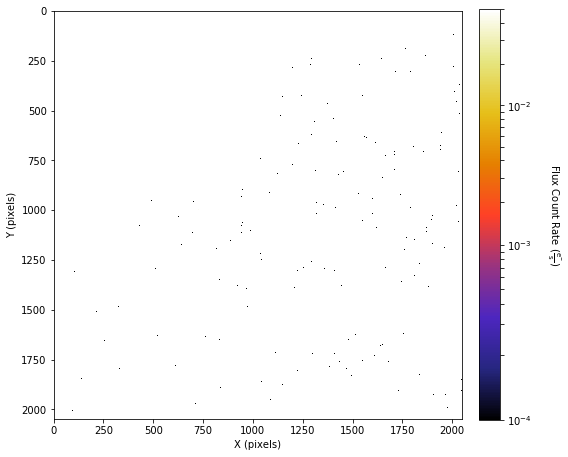

In [37]:
# Set up the figure with subplots
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

# Set up the normalization and colormap
norm_image = ImageNormalize(vmin=1e-4, vmax=5e-2, stretch=LogStretch(), clip=False)
cmap = plt.get_cmap('CMRmap')
cmap.set_bad('white') # Show masked data as white
xdf_image_clipped = np.clip(xdf_image, 1e-4, None) # clip to plot with logarithmic stretch

# Plot the data
fitsplot = ax1.imshow(np.ma.masked_where(xdf_image.mask, xdf_image_clipped), 
                      norm=norm_image, cmap=cmap)

# Define the colorbar and fix the labels
cbar = plt.colorbar(fitsplot, fraction=0.046, pad=0.04, ticks=LogLocator(subs=range(10)))
labels = ['$10^{-4}$'] + [''] * 8 + ['$10^{-3}$'] + [''] * 8 + ['$10^{-2}$']
cbar.ax.set_yticklabels(labels)

# Define labels
cbar.set_label(r'Flux Count Rate ({})'.format(xdf_image.unit.to_string('latex')), 
               rotation=270, labelpad=30)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')

In [38]:
image_dataB = hdulist[0].data

ValueError: I/O operation on closed file

In [39]:
from photutils import find_peaks
from photutils.centroids import centroid_2dg

In [41]:
mean, median, std = sigma_clipped_stats(xdf_image.data, sigma=3.0, maxiters=5, mask=xdf_image.mask)

In [ ]:
sources_findpeaks = find_peaks(xdf_image.data, mask=xdf_image.mask, 
                               threshold=20.*std, box_size=30, 
                               centroid_func=centroid_2dg)     
# Display the table
sources_findpeaks